# Installations

# Numerical Method

## Bisection Method for Finding Equation Roots

Cari nilai x di selang [0, 2] yang memenuhi persamaan x.sin(x) = 1.

In [3]:
import pandas as pd
import numpy as np

# Required information
a = 0  # lower bound
b = 2  # upper bound

def f(x):
    return x * np.sin(x) - 1  # the function from the problem

iter_max = 50  # maximum allowed iterations
tol_max = 0.00000005  # acceptable error tolerance

# initial condition
i = 1

# creating a container for iteration results
results = pd.DataFrame(columns=['n', 'a', 'b', 'c'])

# iterations start here
while i <= iter_max and (b - a) / 2 > tol_max:
    p = a + ((b - a) / 2)  # taking the value of p, the midpoint between a and b
    FP = f(p)  # evaluate f(p)
    FA = f(a)  # evaluate f(a)
    FB = f(b)  # evaluate f(b)
    results.loc[i] = [i, a, b, p]  # store the calculation results in the container
    if FA * FP < 0:
        b = p
    else:
        a = p  # recall the bisection rule!
    i = i + 1  # increment i for iteration

print(results)


       n         a         b         c
1    1.0  0.000000  2.000000  1.000000
2    2.0  1.000000  2.000000  1.500000
3    3.0  1.000000  1.500000  1.250000
4    4.0  1.000000  1.250000  1.125000
5    5.0  1.000000  1.125000  1.062500
6    6.0  1.062500  1.125000  1.093750
7    7.0  1.093750  1.125000  1.109375
8    8.0  1.109375  1.125000  1.117188
9    9.0  1.109375  1.117188  1.113281
10  10.0  1.113281  1.117188  1.115234
11  11.0  1.113281  1.115234  1.114258
12  12.0  1.113281  1.114258  1.113770
13  13.0  1.113770  1.114258  1.114014
14  14.0  1.114014  1.114258  1.114136
15  15.0  1.114136  1.114258  1.114197
16  16.0  1.114136  1.114197  1.114166
17  17.0  1.114136  1.114166  1.114151
18  18.0  1.114151  1.114166  1.114159
19  19.0  1.114151  1.114159  1.114155
20  20.0  1.114155  1.114159  1.114157
21  21.0  1.114157  1.114159  1.114158
22  22.0  1.114157  1.114158  1.114157
23  23.0  1.114157  1.114157  1.114157
24  24.0  1.114157  1.114157  1.114157
25  25.0  1.114157  1.114

## Newton Method for Finding Equation Roots

In [6]:
from sympy import symbols, diff

# Define the symbol
x = symbols('x')

# Define the equation
eq = x**3 - x**2 - 70

# Differentiate the equation with respect to x
diff_eq = diff(eq, x)

# Convert the differentiated equation to a string
diff_eq_str = str(diff_eq)

print(diff_eq_str)

3*x**2 - 2*x


In [7]:
import pandas as pd
import numpy as np

# Define the necessary information
x_0 = 10
def f(x):
    return x**3 - x**2 - 70

def df(x):
    return 3*x**2 - 2*x

iter_max = 50
tol_max = 10**-2

# initial condition
i = 1
hasil = pd.DataFrame(columns=['n_iter', 'p'], index=[0])
hasil.loc[0] = [0, x_0]

while i <= iter_max:
    p = x_0 - (f(x_0) / df(x_0))
    hasil.loc[i] = [i, p]
    if abs(p - x_0) < tol_max:
        break
    x_0 = p
    i += 1

# print output
print(hasil.to_string(index=False))

n_iter         p
     0        10
   1.0  7.035714
   2.0  5.333925
   3.0  4.620209
   4.0  4.487392
   5.0  4.483027


## Golden Ratio for Finding Equation Roots

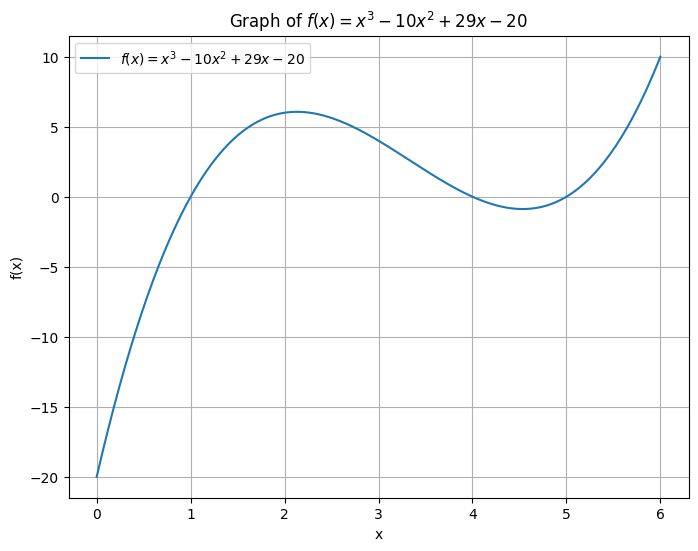

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**3 - 10*x**2 + 29*x - 20

# Generate x values
x = np.linspace(0, 6, 400)  # 400 points between 0 and 6

# Generate y values
y = f(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = x^3 - 10x^2 + 29x - 20$')

# Add labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of $f(x) = x^3 - 10x^2 + 29x - 20$')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()

fungsi f(x) = x^3 - 10x^2 + 29x -20 di 0 <= x <= 6, tentukan semua akarnya dengan metode Golden Section Search 

In [9]:
from math import sqrt

# define r as the golden ratio
r = (1 + sqrt(5)) / 2
tol_max = 10 ** (-10)

# Define the problem function
def f_initial(x):
    return x**3 - 10*x**2 + 29*x - 20

def f(x):
    return abs(x**3 - 10*x**2 + 29*x - 20)

# initial values
def golden_ss(a=0, b=2):

    while abs(b - a) > tol_max:
        c = b - (b - a) / r
        d = a + (b - a) / r
        
        if f(c) < f(d):
            b = d
        else:
            a = c

    return (a + b) / 2

print(golden_ss(0, 2))
print(golden_ss(3.5, 4.5))
print(golden_ss(4.5, 6))

1.0000000000135723
4.000000000000001
4.999999999996607


# Chaotic vs probabilistic

### Chaotic System (Logistic Map):
The logistic map is a classic example of a chaotic system. It is defined by the recursive equation:

\[x_{n+1} = r \cdot x_n \cdot (1 - x_n)\]

Where:
- \(x_n\) is the population at time step \(n\).
- \(r\) is the growth rate parameter.

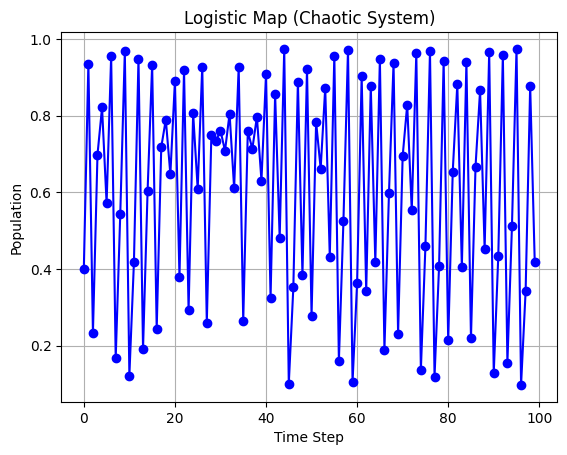

In [1]:
import matplotlib.pyplot as plt

def logistic_map(r, x0, steps):
    results = [x0]
    for _ in range(1, steps):
        x = results[-1]
        next_x = r * x * (1 - x)
        results.append(next_x)
    return results

# Parameters
r = 3.9  # Growth rate parameter
x0 = 0.4  # Initial population
steps = 100

# Simulate the logistic map
population = logistic_map(r, x0, steps)

# Plot the results
plt.plot(range(steps), population, linestyle='-', marker='o', color='b')
plt.title('Logistic Map (Chaotic System)')
plt.xlabel('Time Step')
plt.ylabel('Population')
plt.grid(True)
plt.show()

### Probabilistic System (Coin Toss):
A simple example of a probabilistic system is a coin toss. We'll simulate flipping a fair coin multiple times.

```python

```

In the above code, we simulate flipping a fair coin 100 times and count the occurrences of heads and tails. The outcome is probabilistic since each flip has an equal chance of resulting in heads or tails.

In [2]:
import random

def coin_toss(num_tosses):
    outcomes = []
    for _ in range(num_tosses):
        outcome = random.choice(['Heads', 'Tails'])
        outcomes.append(outcome)
    return outcomes

# Parameters
num_tosses = 100

# Simulate coin tosses
outcomes = coin_toss(num_tosses)

# Counting the occurrence of Heads and Tails
heads_count = outcomes.count('Heads')
tails_count = outcomes.count('Tails')

# Display results
print(f"Heads: {heads_count} Tails: {tails_count}")

Heads: 48 Tails: 52
